<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

<class 'numpy.ndarray'> (200,) float32
<class 'numpy.ndarray'> (200,) float32


Text(0, 0.5, 'y')

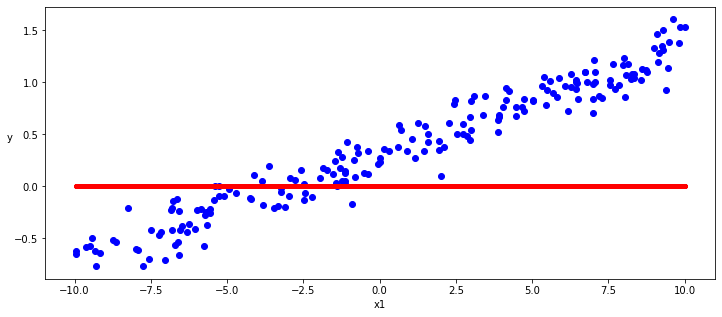

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()

print(type(x), x.shape, x.dtype)
print(type(y), y.shape, y.dtype)

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        y_pred = x * self.w + self.b
        return y_pred

# class LinearRegressionKeras(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.params = {
#             "w" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1)),
#             "b" : tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
#         }        

#     def __call__(self,x): 
#         y_pred = x * self.params["w"] + self.params["b"]
#         return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 0, Loss 0.7022075057029724
Step 20, Loss 0.16949069499969482
Step 40, Loss 0.12842822074890137
Step 60, Loss 0.11838971823453903
Step 80, Loss 0.11083658039569855
Step 100, Loss 0.103960782289505
Step 120, Loss 0.09761091321706772
Step 140, Loss 0.09174107760190964
Step 160, Loss 0.0863146111369133
Step 180, Loss 0.08129801601171494
Step 200, Loss 0.07666032016277313
Step 220, Loss 0.0723729282617569
Step 240, Loss 0.06840936094522476
Step 260, Loss 0.06474515795707703
Step 280, Loss 0.06135772168636322
Step 300, Loss 0.05822615325450897
Step 320, Loss 0.055331092327833176
Step 340, Loss 0.05265471339225769
Step 360, Loss 0.050180479884147644
Step 380, Loss 0.04789312183856964
Step 400, Loss 0.0457785464823246
Step 420, Loss 0.043823666870594025
Step 440, Loss 0.04201645404100418
Step 460, Loss 0.04034573584794998
Step 480, Loss 0.03880121558904648


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

# criterion = torch.nn.MSELoss(reduction='mean')
# optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    # optimizer.zero_grad()
    loss.backward()
    # optimizer.step()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.9666774272918701
Epoch 20 : Loss 0.1753772795200348
Epoch 40 : Loss 0.11911105364561081
Epoch 60 : Loss 0.10886337608098984
Epoch 80 : Loss 0.10197329521179199
Epoch 100 : Loss 0.09576345235109329
Epoch 120 : Loss 0.09003251791000366
Epoch 140 : Loss 0.08473505079746246
Epoch 160 : Loss 0.07983776926994324
Epoch 180 : Loss 0.07531037926673889
Epoch 200 : Loss 0.07112494856119156
Epoch 220 : Loss 0.06725563853979111
Epoch 240 : Loss 0.06367859244346619
Epoch 260 : Loss 0.060371704399585724
Epoch 280 : Loss 0.057314611971378326
Epoch 300 : Loss 0.0544884018599987
Epoch 320 : Loss 0.05187566578388214
Epoch 340 : Loss 0.0494602769613266
Epoch 360 : Loss 0.04722733050584793
Epoch 380 : Loss 0.04516303911805153
Epoch 400 : Loss 0.04325466230511665
Epoch 420 : Loss 0.04149043187499046
Epoch 440 : Loss 0.03985943645238876
Epoch 460 : Loss 0.0383516401052475
Epoch 480 : Loss 0.03695773705840111


# Data Visualization

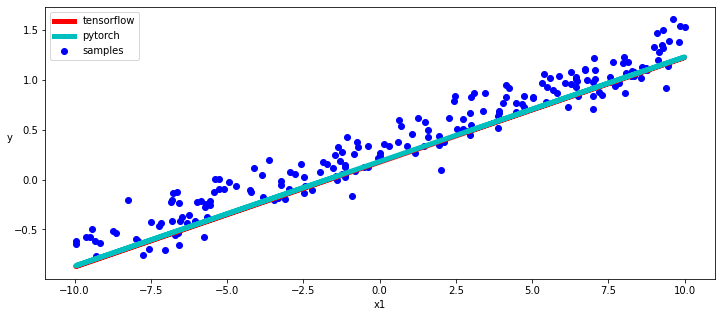

In [13]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)